### Importing lib:

In [1]:
import sys
import os

sys.path.append('../')

import neurobot

### Importing toy dataset from `sklearn.datasets.load_breast_cancer()`

In [2]:
from sklearn import datasets

data = datasets.load_breast_cancer()

###### Choose your X (train_data) and y (train_targets) as `pandas.DataFrame()` or  `numpy.array()`:

In [3]:
# X and y suppose to be either np.arrays or pd.DataFrames

X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

### Defining new object of Grid Cross Validation Linear class:

In [4]:
from neurobot.linear import linear_grid

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.from_model module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [5]:
import pandas as pd

In [6]:
temp_grid = linear_grid.GridCVLinear(X, y)

In [8]:
temp_grid.train()

Number of samples  569 

Number of features  30 

Target distribution: 
1    357
0    212
Name: 0, dtype: int64 

Training SVC(linear)...
(training took 11.051142930984497s)

Training LR...
(training took 2.6856746673583984s)

Training RFC...
(training took 22.165415287017822s)



[Pipeline(memory=None,
          steps=[('Fill_NaN',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='median',
                                verbose=0)),
                 ('StdScaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('oversampling',
                  SMOTE(k_neighbors=5, n_jobs=-1, random_state=42,
                        sampling_strategy='minority')),
                 ('dim_reduction',
                  SelectKBest(k='all',
                              score_func=<function f_classif at 0x00000224449951F8>)),
                 ('classifier',
                  LogisticRegression(C=0.01, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='auto', n_jobs=None,
  

,best parameters,best dim. reduction method,mean,std
classifier,,,,
SVC,"classifier__C = 10, classifier__class_weight =...","SelectKBest(k='all', score_func=<function f_cl...",0.990514,0.007157
LR,"classifier__C = 0.01, classifier__penalty = l2","SelectKBest(k='all', score_func=<function f_cl...",0.993682,0.004659
RFC,"classifier__class_weight = {1: 1, 0: 1}, class...","SelectKBest(k='all', score_func=<function f_cl...",0.992002,0.005714


<Figure size 576x1008 with 0 Axes>

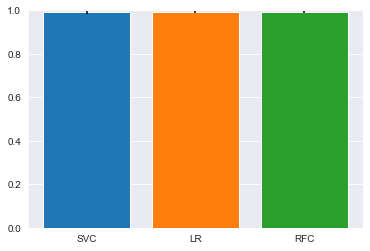

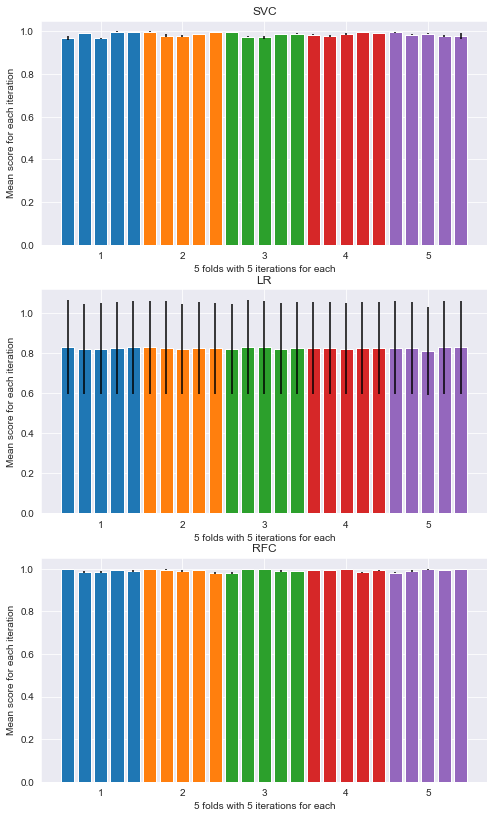

Best model: 


..\neurobot\linear\linear_grid.py:117: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  clf = results.loc[results["mean"].argmax(), "classifier"]


LR
classifier__C = 0.01
classifier__penalty = l2
dim_reduction = SelectKBest(k='all', score_func=<function f_classif at 0x00000224449951F8>)


In [9]:
# observing function
temp_grid.print_results()

In [10]:
temp_grid.bootstrap_632()

test_classification
SVC  acc: 97.37%  95% Confidence interval: [95.69, 98.42]  time 14.8
LR  acc: 97.19%  95% Confidence interval: [95.87, 98.48]  time 11.46
RFC  acc: 97.56%  95% Confidence interval: [95.97, 98.82]  time 70.4


In [11]:
temp_grid.loo_cv()

# test_classification
# SVC:   acc 0.96  tpr 0.94  tnr 0.97  time 97.8
# LR:   acc 0.97  tpr 0.97  tnr 0.97  time 66.53
# RFC:   acc 0.96  tpr 0.95  tnr 0.96  time 410.69

test_classification
SVC:   acc 0.96  tpr 0.94  tnr 0.97  time 90.54
LR:   acc 0.97  tpr 0.97  tnr 0.97  time 68.39
RFC:   acc 0.96  tpr 0.95  tnr 0.96  time 335.14


Number of samples  569 

Number of features  30 

Target distribution: 
1    357
0    212
Name: 0, dtype: int64 

Training SVC(linear)...
(training took 9.276021003723145s)

Training LR...
(training took 2.6564595699310303s)

Training RFC...
(training took 20.621074676513672s)




,best parameters,best dim. reduction method,mean,std
classifier,,,,
SVC,"classifier__C = 10, classifier__class_weight =...","SelectKBest(k='all', score_func=<function f_cl...",0.990514,0.007157
LR,"classifier__C = 0.01, classifier__penalty = l2","SelectKBest(k='all', score_func=<function f_cl...",0.993682,0.004659
RFC,"classifier__class_weight = {1: 1, 0: 1}, class...","SelectKBest(k='all', score_func=<function f_cl...",0.992002,0.005714


<Figure size 576x1008 with 0 Axes>

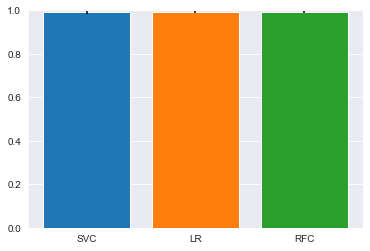

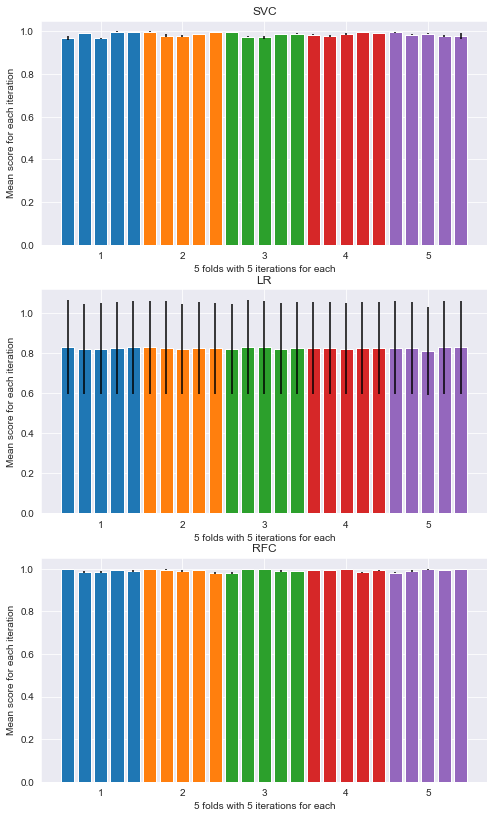

Best model: 


..\neurobot\linear\linear_grid.py:117: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  clf = results.loc[results["mean"].argmax(), "classifier"]


LR
classifier__C = 0.01
classifier__penalty = l2
dim_reduction = SelectKBest(k='all', score_func=<function f_classif at 0x00000224449951F8>)

Bootstrap_632:
test_classification
SVC  acc: 97.37%  95% Confidence interval: [95.69, 98.42]  time 14.21
LR  acc: 97.19%  95% Confidence interval: [95.87, 98.48]  time 11.44
RFC  acc: 97.56%  95% Confidence interval: [95.97, 98.82]  time 56.51

Loo_cv:
test_classification
SVC:   acc 0.96  tpr 0.94  tnr 0.97  time 88.09
LR:   acc 0.97  tpr 0.97  tnr 0.97  time 69.87
RFC:   acc 0.96  tpr 0.95  tnr 0.96  time 330.99


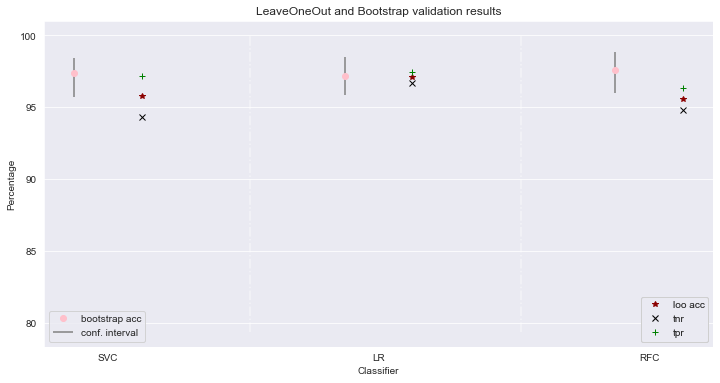

FileNotFoundError: [Errno 2] No such file or directory: 'results/cancer_grid_val_plot.png'

In [12]:
# function with validation, full pipeline
temp_grid.train_val(problem_name='cancer', 
                    fig_name='results/cancer_grid_val_plot')

//TODO 
0. почему у LR на фолдах такая дисперсия
1. check logging file
2. проверить импорты, не импортируем ли мы слишком много
3. исправить ворнинги
4. сделать отчет входного анализа
5. сделать входный выбор грида